In [1]:
# Written by Anna C Helfeld C
# Fall 2018-Winter 2019

# This code uses my solutions written in Octave/Matlab as a guide
# Machine Learning - Andrew Ng class on Coursera
# Homework 3: Multi-class classification and neural networks

In [123]:
# Import libraries
from pandas import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import scipy.io as sio
import math as mth

In [3]:
# Part 1: Multi-class classification of digits
# X contains pixel data of handwritten digits
# y contains digit class (1, 2, 3, etc.)

# Make sure file exists
import os  
os.path.isfile('./ex3data1.mat')    # True  

True

In [4]:
# Load data
import h5py 
digitfile = sio.loadmat('ex3data1.mat') 
digitfile

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [23]:
# Put X and y data into arrays
Xdata = digitfile['X']
ydata = digitfile['y']
Alldata = np.concatenate((Xdata,ydata), axis=1)

In [24]:
Alldatadf = DataFrame(data=Alldata)  #Put data into data frame
Alldatadf.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


In [25]:
Alldatadf_ran = Alldatadf.sample(frac=1) #randomize data
Alldatadf_ran.head() #check 

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
3233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
2838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [26]:
Alldatadf_ran.shape[0] #Check

5000

In [34]:
# Split into training data and cross-validation data
Xtrain = Alldatadf_ran.iloc[0:mth.floor(Alldatadf_ran.shape[0]*0.8),0:-1]
ytrain = Alldatadf_ran.iloc[0:mth.floor(Alldatadf_ran.shape[0]*0.8),-1]

Xcv = Alldatadf_ran.iloc[mth.floor(Alldatadf_ran.shape[0]*0.8):Alldatadf_ran.shape[0],0:-1]
ycv = Alldatadf_ran.iloc[mth.floor(Alldatadf_ran.shape[0]*0.8):Alldatadf_ran.shape[0],-1]

In [35]:
# Put into arrays
Xtrain_a = Xtrain.values
ytrain_a = ytrain.values
Xcv_a = Xcv.values
ycv_a = ycv.values

In [78]:
# Logistic regression solvers: ‘newton-cg’, ‘sag’, ‘saga’, ‘lbfgs’, ‘liblinear’
clf = LogisticRegression(solver='liblinear',multi_class='auto', max_iter = 1000).fit(Xtrain_a,ytrain_a)

In [79]:
# Obtain predictions for cross-validation set
ypredict = clf.predict(Xcv_a)

In [80]:
# Check accuracy of classifier
def accuracy(y,ypred):
    ycheck = y-ypred
    error = float(np.nonzero(ycheck)[0].size)/float(y.size)
    return 1-error

In [81]:
accuracy(ycv_a,ypredict)

0.911

In [87]:
# Loop over solvers, test accuracy
sv_test = ['newton-cg','sag','saga','lbfgs','liblinear']
acc_v = np.zeros((5,1))
for i in range(0,5):
    clf = LogisticRegression(solver=sv_test[i],multi_class='auto', max_iter = 300).fit(Xtrain_a,ytrain_a)
    ypredict = clf.predict(Xcv_a)
    acc_v[i]=accuracy(ycv_a,ypredict)

In [88]:
acc_v

array([[0.908],
       [0.908],
       [0.908],
       [0.908],
       [0.911]])

In [112]:
# Loop over different regularizations, test accuracy; using liblinear solver
reg_test = np.array([0.2, 0.5, 0.8, 1, 1.2, 1.5, 1.8])
acc_vr = np.zeros((7,2))
for i in range(0,7):
    clf = LogisticRegression(solver='liblinear',multi_class='auto', max_iter = 300, C=reg_test[i]).fit(Xtrain_a,ytrain_a)
    ypredict = clf.predict(Xcv_a)
    ypredict_tr = clf.predict(Xtrain_a)
    acc_vr[i,0]=accuracy(ycv_a,ypredict)
    acc_vr[i,1]=accuracy(ytrain_a,ypredict_tr)

In [113]:
acc_vr

array([[0.907  , 0.92775],
       [0.908  , 0.9395 ],
       [0.909  , 0.9425 ],
       [0.911  , 0.9455 ],
       [0.912  , 0.9465 ],
       [0.91   , 0.94875],
       [0.909  , 0.94975]])

Text(0.5, 1.0, 'Digit Classification Logistic Regression')

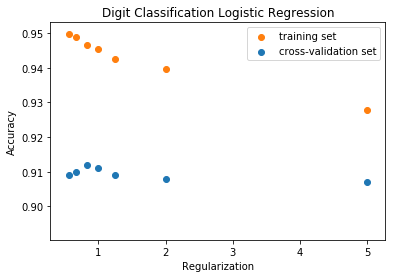

In [121]:
# Plot accuracy of predictions as a function of regularization 
cv_plot = plt.scatter(1/reg_test, acc_vr[:,0], label = 'cv')
train_plot = plt.scatter(1/reg_test, acc_vr[:,1], label = 'train')
plt.legend([train_plot, cv_plot], ['training set', 'cross-validation set'])


plt.xlabel('Regularization')
plt.ylabel('Accuracy')
plt.title('Digit Classification Logistic Regression')

In [130]:
# Part 2: Neural networks using MLP classifier
# One hidden layer with 25 neurons
clf_nn = MLPClassifier(hidden_layer_sizes=(25,), activation='logistic', solver = 'lbfgs' , alpha=0.0001, max_iter = 200).fit(Xtrain_a,ytrain_a)

In [131]:
# Obtain predictions for cross-validation set
ypredict_nn = clf_nn.predict(Xcv_a)

In [132]:
accuracy(ycv_a,ypredict_nn)

0.921

In [148]:
# Loop over different regularizations, test accuracy; using NN solver
alpha_test = np.array([0.00005, 0.0001, 0.0003, 0.001, 0.01])
accnn_vr = np.zeros((5,2))
for i in range(0,5):
    clf_nn = MLPClassifier(hidden_layer_sizes=(25,), activation='logistic', solver = 'lbfgs' , alpha=alpha_test[i], max_iter = 200).fit(Xtrain_a,ytrain_a)
    ypredictnn = clf_nn.predict(Xcv_a)
    ypredictnn_tr = clf_nn.predict(Xtrain_a)
    accnn_vr[i,0]=accuracy(ycv_a,ypredictnn)
    accnn_vr[i,1]=accuracy(ytrain_a,ypredictnn_tr)

In [149]:
accnn_vr

array([[0.922 , 1.    ],
       [0.913 , 1.    ],
       [0.908 , 1.    ],
       [0.906 , 1.    ],
       [0.92  , 0.9995]])

Text(0.5, 1.0, 'Digit Classification Neural Network')

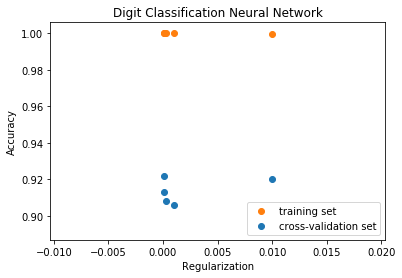

In [150]:
# Plot accuracy of NN predictions as a function of regularization 
cv_plotnn = plt.scatter(alpha_test, accnn_vr[:,0], label = 'cv')
train_plotnn = plt.scatter(alpha_test, accnn_vr[:,1], label = 'train')
plt.legend([train_plotnn, cv_plotnn], ['training set', 'cross-validation set'])


plt.xlabel('Regularization')
plt.ylabel('Accuracy')
plt.title('Digit Classification Neural Network')